1. Почистить данные (подсказка: проблема имеет один и тот же тип).
2. Посчитать долю негативных и позитивных результатов по каждому тесту, составить рейтинг позитивности тестов.
3. Составить рейтинг  тестов  по доходности отдельно для мобильных устройств и для десктопа (только по  сессиям с позитивным результатом).  Определить лучший тест  в каждом сегменте, учитывая рейтинг позитивности. Если у  теста-лидера  по доходности показатель  позитивности  меньше 77% - лучшим тестом принимаем следующий  в рейтинге по  доходности. 
4. Составить рейтинг тестов по доходности в различных ценовых интервалах (только по  сессиям с позитивным результатом).  Критерий- стоимость заказа.  Один из интервалов - 10000,01 руб -25000,00 руб, прочие интервалы - на усмотрение кандидата. Определить  лучший тест  в каждом сегменте, учитывая рейтинг позитивности. Если у  теста-лидера по доходности показатель  позитивности  меньше 77% - лучшим тестом принимаем следующий в рейтинге по  доходности.
5. Сделать основные выводы по результатам опроса (не менее 10)
6. На основании выводов - предложить компании А рекомендации по изменению процессов и по работе с клиентами (не менее 5)!)

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns

In [56]:
#  Выгрузим данные в блокнот

In [57]:
df = pd.read_excel('/Users/leonid/Downloads/тестовое задание (аналитик команды роста) (2).xlsx', sheet_name='Тесты')

In [58]:
df.columns = ['order_id','revenue','status','ui','profit','test']

In [59]:
df = df.set_index('order_id')
df

,revenue,status,ui,profit,test
order_id,,,,,
1,5360.0,Оплачен,mobile,NaN,исходные показатели
2,12760.0,Оплачен,mobile,NaN,исходные показатели
3,27378.0,Оплачен,mobile,299.0,исходные показатели
4,11056.0,Оплачен,mobile,NaN,исходные показатели
5,9160.0,Оплачен,mobile,NaN,исходные показатели
...,...,...,...,...,...
41687,16627.0,Не оплачен,mobile,NaN,15
41688,23710.0,Оплачен,desktop,NaN,15
41689,8879.0,Оплачен,desktop,299.0,15


In [60]:
# исследуем данные
df.info()
# видим, что несмотря на некорревность данных ноутбук автоматически определил колонки revenue и profit как числовые переменные

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41691 entries, 1 to 41691
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   revenue  41691 non-null  float64
 1   status   41691 non-null  object 
 2   ui       41477 non-null  object 
 3   profit   4350 non-null   float64
 4   test     41691 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.9+ MB


In [27]:
#  исследуем данные на пропуски

In [62]:
df.isna().all(axis = 1).value_counts()
#  полных пропусков не найдено

False    41691
dtype: int64

In [64]:
df.describe()
#  видим, что не каждому полю выручка соответствует поле прибыль, придумаем как обработаем эти пропуски 

,revenue,profit
count,41691.000000,4350.000000
mean,13273.820345,720.405766
std,17277.243160,1749.527910
min,0.000000,90.000000
25%,5447.000000,216.000000
50%,9659.000000,299.000000
75%,16116.000000,731.000000
max,792325.000000,62152.120000


In [66]:
df.isna().value_counts()

revenue  status  ui     profit  test 
False    False   False  True    False    37127
                        False   False     4350
                 True   True    False      214
dtype: int64

In [84]:
# пропущена большая часть значений прибыли(возможно это неоплаченные заказы, проверим это позже)
#  будем держать в голове что у нас отсутсвует часть значений по устройству

In [ ]:
#  исследуем данные на дубликаты

In [87]:
df.duplicated().value_counts()
#  дубликатов не найдено

False    32599
True      9092
dtype: int64

In [88]:
df.status.value_counts()

Оплачен         31772
Не оплачен       6908
Ошибка           1778
Забронирован     1233
Name: status, dtype: int64

In [91]:
# добавим колонку с результатом теста 
df['result'] = df.status.map({'Оплачен' : 'positive', 'Не оплачен' : 'negative', 'Ошибка' : 'negative' , 'Забронирован' : 'neutral' })

### 2. Посчитать долю негативных и позитивных результатов по каждому тесту, составить рейтинг позитивности тестов.


In [94]:
# В данном случае пропуски в данных не критины

In [119]:
agg_tests_results =  df.groupby(['test', 'result'], as_index=0).aggregate({'revenue' : 'count'}).rename(columns = {'revenue' : 'qua_tests'})

agg_tests_results

,test,result,qua_tests
0,1,negative,559
1,1,neutral,85
2,1,positive,1857
3,2,negative,302
4,2,neutral,47
5,2,positive,1295
6,3,negative,585
7,3,neutral,74
8,3,positive,1993
9,4,negative,458


In [129]:
agg_tests_results_pos = agg_tests_results[agg_tests_results.result == 'positive'].rename(columns={'qua_tests' : 'qua_tests_pos' }).drop(columns = 'result')
agg_tests_results_neg = agg_tests_results[agg_tests_results.result == 'negative'].rename(columns={'qua_tests' : 'qua_tests_neg' }).drop(columns = 'result')
agg_tests_results_sum = agg_tests_results.groupby('test', as_index=False).agg({'qua_tests': 'sum'}).rename(columns={'qua_tests' : 'qua_tests_sum' })
agg_tests_results_sum

,test,qua_tests_sum
0,1,2501
1,2,1644
2,3,2652
3,4,1953
4,5,3150
5,6,2872
6,7,2771
7,8,1323
8,9,1137
9,10,4198


In [142]:
agg_tests_results_rate = agg_tests_results_pos.merge(agg_tests_results_neg, on='test').merge(agg_tests_results_sum, on='test')

agg_tests_results_rate['pos_perc'] = agg_tests_results_rate.qua_tests_pos / agg_tests_results_rate.qua_tests_sum * 100
agg_tests_results_rate['neg_perc'] = agg_tests_results_rate.qua_tests_neg / agg_tests_results_rate.qua_tests_sum * 100


# доли положительных и отрицательных результатов по каждому тесту
agg_tests_results_rate[['test', 'pos_perc','neg_perc']]

,test,pos_perc,neg_perc
0,1,74.250300,22.351060
1,2,78.771290,18.369830
2,3,75.150830,22.058824
3,4,73.988735,23.451101
4,5,77.428571,20.666667
5,6,78.969359,17.827298
6,7,77.372790,20.822808
7,8,73.167045,23.733938
8,9,74.670185,23.482850
9,10,74.035255,22.224869


In [219]:
#  составим рейтинг позитивных тестов
pos_rate = agg_tests_results_rate[['test', 'pos_perc']].sort_values('pos_perc',ascending=False).set_index('test')

pos_rate

,pos_perc
test,
15,78.976875
6,78.969359
14,78.775660
2,78.771290
5,77.428571
7,77.372790
12,76.851852
исходные показатели,75.989736
13,75.900335


## 3. Составить рейтинг  тестов  по доходности отдельно для мобильных устройств и для десктопа (только по  сессиям с позитивным результатом).  Определить лучший тест  в каждом сегменте, учитывая рейтинг позитивности. Если у  теста-лидера  по доходности показатель  позитивности  меньше 77% - лучшим тестом принимаем следующий  в рейтинге по  доходности. 

In [151]:
# в контекте возьмем за основной показатель доходности  ARPPU. Составим рейтинг при этом условии.
df

,revenue,status,ui,profit,test,result
order_id,,,,,,
1,5360.0,Оплачен,mobile,NaN,исходные показатели,positive
2,12760.0,Оплачен,mobile,NaN,исходные показатели,positive
3,27378.0,Оплачен,mobile,299.0,исходные показатели,positive
4,11056.0,Оплачен,mobile,NaN,исходные показатели,positive
5,9160.0,Оплачен,mobile,NaN,исходные показатели,positive
...,...,...,...,...,...,...
41687,16627.0,Не оплачен,mobile,NaN,15,negative
41688,23710.0,Оплачен,desktop,NaN,15,positive
41689,8879.0,Оплачен,desktop,299.0,15,positive


In [167]:
df[df.result == 'positive'].describe()

,revenue,profit
count,31772.000000,3267.000000
mean,12504.591118,626.997404
std,13670.934572,1025.754047
min,299.000000,90.000000
25%,5280.000000,216.000000
50%,9410.000000,299.000000
75%,15594.000000,719.280000
max,701630.000000,27737.560000


In [172]:
df[df.result == 'positive'].revenue.quantile(0.95)
# 95% наблюдений находятся в диапазоне до 32070₽

32070.49999999997

In [239]:
agg_pos_rev_m =  df[(df.result == 'positive') & (df.ui == 'mobile')].groupby('test', as_index=1).aggregate({'revenue': 'sum','result': 'count', }).rename(columns={'revenue' : 'revenue_m','result' : 'quantity_m'})

agg_pos_rev_m['arppu_m'] = agg_pos_rev_m.revenue_m / agg_pos_rev_m.quantity_m

rev_rate_m = agg_pos_rev_m[['quantity_m','arppu_m']].sort_values('arppu_m', ascending=False)

rev_rate_m.merge(pos_rate, on='test')


,quantity_m,arppu_m,pos_perc
test,,,
14,1410,14155.965957,78.775660
7,1532,13084.528721,77.372790
10,2006,12785.605683,74.035255
4,937,12765.506937,73.988735
2,813,12589.798278,78.771290
15,736,12549.338315,78.976875
6,1568,12378.904974,78.969359
8,617,11927.103728,73.167045
5,1680,11668.736310,77.428571


#### Для мобильного сегмента лучшим тестом оказались 14, 7, 10 по показателю ARPPU

In [236]:
agg_pos_rev_d =  df[(df.result == 'positive') & (df.ui == 'desktop')].groupby('test', as_index=1).aggregate({'revenue': 'sum','result': 'count', }).rename(columns={'revenue' : 'revenue_d', 'result' : 'quantity_d'})

agg_pos_rev_d['arppu_d'] = agg_pos_rev_d.revenue_d / agg_pos_rev_d.quantity_d

rev_rate_d = agg_pos_rev_d[['quantity_d','arppu_d']].sort_values('arppu_d', ascending=False)

rev_rate_d.merge(pos_rate, on='test')

,quantity_d,arppu_d,pos_perc
test,,,
7,603,17407.137645,77.372790
14,730,16938.157534,78.775660
2,473,16821.744186,78.771290
10,1084,16782.965867,74.035255
6,687,16233.017467,78.969359
8,343,15725.332362,73.167045
5,749,15668.790387,77.428571
4,499,15103.929860,73.988735
9,236,14828.966102,74.670185


#### Для десктоп сегмента лучшим тестом оказались 7, 14, 2 по показателю ARPPU

### Если брать доходность в контексте как общую выручку, то показатели немного изменятся

In [249]:
agg_pos_rev_m =  df[(df.result == 'positive') & (df.ui == 'mobile')].groupby('test', as_index=1).aggregate({'revenue': 'sum','result': 'count', }).rename(columns={'revenue' : 'revenue_m','result' : 'quantity_m'})



rev_rate_m = agg_pos_rev_m[['quantity_m','revenue_m']].sort_values('revenue_m', ascending=False)

rev_rate_m.merge(pos_rate, on='test')


,quantity_m,revenue_m,pos_perc
test,,,
исходные показатели,2660,27997853.0,75.989736
10,2006,25647925.0,74.035255
13,2516,20053985.0,75.900335
7,1532,20045498.0,77.372790
14,1410,19959912.0,78.775660
5,1680,19603477.0,77.428571
6,1568,19410123.0,78.969359
3,1321,14853693.0,75.150830
1,1216,14018986.0,74.250300


#### Для мобильного сегмента по выручке лучшим тестом оказались 7, 14, 5 

In [243]:
agg_pos_rev_d =  df[(df.result == 'positive') & (df.ui == 'desktop')].groupby('test', as_index=1).aggregate({'revenue': 'sum','result': 'count', }).rename(columns={'revenue' : 'revenue_d', 'result' : 'quantity_d'})

rev_rate_d = agg_pos_rev_d[['quantity_d','revenue_d']].sort_values('revenue_d', ascending=False)

rev_rate_d.merge(pos_rate, on='test')

,quantity_d,revenue_d,pos_perc
test,,,
исходные показатели,1454,19092270.0,75.989736
10,1084,18192735.0,74.035255
14,730,12364855.0,78.775660
5,749,11735924.0,77.428571
6,687,11152083.0,78.969359
7,603,10496504.0,77.372790
13,1102,10453967.0,75.900335
3,661,9435857.0,75.150830
1,635,8710691.0,74.250300


#### Для десктоп сегмента по выручке лучшим тестом оказались 14,5,6

In [246]:
# Данные по прибыли выглядят очень не надежно для того, чтобы делать выводы на их основе, так как встречаются противоречия, например, при отмененном заказе числится прибыль  

#### Примечательно, что метрика ARPPU стала сильно выше в тестах по сравнению с исходными показателями , но на рейтинге по выручке мы видим наивысшую выручку на исходных данных. 

## 4. Составить рейтинг тестов по доходности в различных ценовых интервалах (только по  сессиям с позитивным результатом).  Критерий- стоимость заказа.  Один из интервалов - 10000,01 руб -25000,00 руб, прочие интервалы - на усмотрение кандидата. Определить  лучший тест  в каждом сегменте, учитывая рейтинг позитивности. Если у  теста-лидера по доходности показатель  позитивности  меньше 77% - лучшим тестом принимаем следующий в рейтинге по  доходности.!

## рейтинг по выручке

In [280]:
df.revenue.quantile(0.95)

34035.0

<AxesSubplot:>

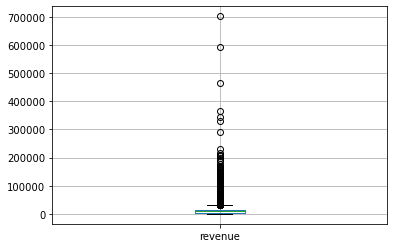

In [284]:
df.loc[(df.result == 'positive')&(df.revenue <df.revenue.quantile(1)) ,  ['revenue']].boxplot()
#  на графике мы видим очень большие выбросы, избавимся от них задав 95 квартиль

<AxesSubplot:>

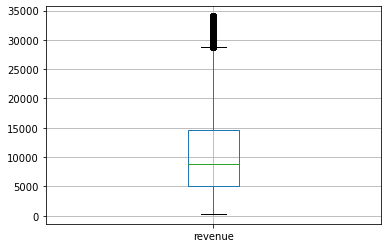

In [286]:
df.loc[(df.result == 'positive')&(df.revenue <df.revenue.quantile(0.95)) ,  ['revenue']].boxplot()
#  на графике мы видим очень большие выбросы, избавимся от них задав 95 квартиль

Cейчас мы видим, что ,более точно было бы взять сегменты:

до 5 тыс.

от 5 тыс. до 15 тыс. - основной

от 15 до 30 тыс. 

от 30 тыс.



Cдвинем границы исходя из задания:

до 10 тыс.

от 10 тыс. до 25 тыс. - основной

от 25 до 30 тыс. 

от 30 тыс. 

In [307]:
bins = [0,10000,25000,30000,1000000]
pd.cut(df.revenue, bins, labels=['0-10k.','10-25k','25-30k','30k+'])


order_id
1        0-10k.
2        10-25k
3        25-30k
4        10-25k
5        0-10k.
          ...  
41687    10-25k
41688    10-25k
41689    0-10k.
41690      30k+
41691      30k+
Name: revenue, Length: 41691, dtype: category
Categories (4, object): ['0-10k.' < '10-25k' < '25-30k' < '30k+']

In [331]:
df['segment'] = pd.cut(df.revenue, bins, labels=['0-10k.','10-25k','25-30k','30k+'])
df[(df.result == 'positive')].groupby(['segment', 'test']).agg({'revenue' : 'sum'}).sort_values(['segment', 'revenue'], ascending = [True, False]).head(50)

revenue
segment test                           
0-10k.  исходные показатели  13442096.0
        13                   13337149.0
        10                    8624376.0
        5                     7523155.0
        6                     6412811.0
        14                    6107863.0
        7                     6032362.0
        3                     5725592.0
        1                     5014696.0
        2                     3967831.0
        12                    3930370.0
        11                    3492425.0
        4                     3477750.0
        15                    3429710.0
        8                     2781999.0
        9                     2530155.0
10-25k  исходные показатели  22501099.0
        10                   20165907.0
        5                    14390146.0
        6                    14086753.0
        14                   13056752.0
        7                    12898741.0
        1                    12016251.0
        3                    11950881.0
        4                    10744300.0
        13                   10520774.0
        2                     7741237.0
        12                    6563222.0
        8                     6406569.0
        15                    6334709.0
        11                    6033159.0
        9                     4837249.0
25-30k  10                    3951401.0
        исходные показатели   3282146.0
        7                     2825239.0
        5                     2803460.0
        6                     2505082.0
        14                    2498445.0
        3                     2221185.0
        2                     2030369.0
        1                     1740751.0
        4                     1714505.0
        13                    1414655.0
        8                     1322053.0
        11                    1125840.0
        15                    1040869.0
        12                     846776.0
        9                      737758.0
30k+    10                   11223257.0
        14                   10814021.0

In [326]:
pos_rate

,pos_perc
test,
15,78.976875
6,78.969359
14,78.775660
2,78.771290
5,77.428571
7,77.372790
12,76.851852
исходные показатели,75.989736
13,75.900335


In [ ]:
в сегментах лучшими оказалсяЖ

до 10 тыс. - 5 тест

от 10 тыс. до 25 тыс. - 5 тест

от 25 до 30 тыс. - 7 тест

от 30 тыс. - 14 тест


## Рейтинг по ARPPU

In [333]:
df['segment'] = pd.cut(df.revenue, bins, labels=['0-10k.','10-25k','25-30k','30k+'])
df

,revenue,status,ui,profit,test,result,segment
order_id,,,,,,,
1,5360.0,Оплачен,mobile,NaN,исходные показатели,positive,0-10k.
2,12760.0,Оплачен,mobile,NaN,исходные показатели,positive,10-25k
3,27378.0,Оплачен,mobile,299.0,исходные показатели,positive,25-30k
4,11056.0,Оплачен,mobile,NaN,исходные показатели,positive,10-25k
5,9160.0,Оплачен,mobile,NaN,исходные показатели,positive,0-10k.
...,...,...,...,...,...,...,...
41687,16627.0,Не оплачен,mobile,NaN,15,negative,10-25k
41688,23710.0,Оплачен,desktop,NaN,15,positive,10-25k
41689,8879.0,Оплачен,desktop,299.0,15,positive,0-10k.


In [346]:
df_seg_arp = df[(df.result == 'positive')].groupby(['segment', 'test']).agg({'revenue' : 'sum', 'result' : 'count'}).rename(columns={'result' : 'quantity'})



df_seg_arp['arppu'] = df_seg_arp.revenue /df_seg_arp. quantity

df_seg_arp.sort_values(['segment', 'arppu'], ascending = [True, False]).drop(columns = ['revenue','quantity']) .head(50)



arppu
segment test                             
0-10k.  2                     6379.149518
        14                    6083.528884
        10                    6052.193684
        5                     5999.326156
        8                     5957.171306
        4                     5815.635452
        15                    5793.429054
        7                     5778.124521
        6                     5730.840929
        исходные показатели   5659.829895
        9                     5500.336957
        11                    5499.881890
        3                     5458.142993
        12                    5347.442177
        1                     5323.456476
        13                    4881.826135
10-25k  8                    16016.422500
        1                    15790.080158
        11                   15670.542857
        15                   15641.256790
        3                    15622.066667
        10                   15596.215777
        9                    15553.855305
        12                   15552.658768
        2                    15544.652610
        6                    15462.956092
        7                    15410.682198
        14                   15397.113208
        4                    15392.979943
        исходные показатели  15359.111945
        5                    15341.307036
        13                   14531.455801
25-30k  11                   27459.512195
        15                   27391.289474
        9                    27324.370370
        12                   27315.354839
        6                    27229.152174
        4                    27214.365079
        13                   27204.903846
        1                    27199.234375
        7                    27165.759615
        14                   27157.010870
        исходные показатели  27125.173554
        3                    27087.621951
        2                    27071.586667
        10                   27064.390411
        8                    26980.673469
        5                    26956.346154
30k+    7                    55681.635220
        6                    52868.198630

In [ ]:
# 2, 15, 15, 7

в сегментах по ARPPU лучшими оказался:

до 10 тыс. - 2 тест

от 10 тыс. до 25 тыс. - 15 тест

от 25 до 30 тыс. - 15 тест

от 30 тыс. - 7 тест


pos_rate

In [351]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
